<a href="https://colab.research.google.com/github/Cknowles11/DS-Unit-2-Linear-Models/blob/master/Copy_of_LS_DS_214_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Begin with baselines for classification.
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)
- [ ] Get your model's test accuracy. (One time, at the end.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

In [2]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# # If you're working locally:
# else:
#     DATA_PATH = '../data/'

In [3]:
# Load data downloaded from https://srcole.github.io/100burritos/
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

In [4]:
# Derive binary classification target:
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos.
df = df.dropna(subset=['overall'])
df['Great'] = df['overall'] >= 4

In [5]:
# Clean/combine the Burrito categories
df['Burrito'] = df['Burrito'].str.lower()

california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [6]:
# Drop some high cardinality categoricals
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [7]:
# Drop some columns to prevent "leakage"
df = df.drop(columns=['Rec', 'overall'])

In [68]:
df.sample(10)

,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
338,California,2017,NaN,NaN,NaN,6.25,3.0,NaN,NaN,NaN,NaN,NaN,4.5,4.5,3.7,3.5,4.0,3.5,3.0,4.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
287,California,2016,NaN,NaN,NaN,7.90,3.5,NaN,NaN,NaN,NaN,NaN,4.0,3.5,4.7,4.0,4.5,4.5,4.5,4.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
210,California,2016,NaN,NaN,NaN,7.50,2.5,NaN,NaN,19.0,23.5,0.83,3.0,3.0,5.0,3.5,3.0,3.5,4.5,4.0,4.5,NaN,NaN,x,x,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
56,Other,2016,NaN,NaN,NaN,7.95,2.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,4.0,3.0,5.0,3.0,3.0,5.0,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
394,California,2018,NaN,NaN,NaN,8.99,4.0,NaN,NaN,25.0,23.0,1.05,4.5,4.5,4.0,4.0,3.0,4.0,3.5,4.0,3.0,NaN,NaN,x,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
250,California,2016,4.0,3.8,NaN,6.10,4.0,NaN,NaN,22.0,22.0,0.85,3.5,3.5,2.0,3.5,4.5,3.5,3.0,3.5,4.0,NaN,NaN,X,NaN,X,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
15,California,2016,4.5,4.4,NaN,7.49,4.0,NaN,NaN,NaN,NaN,NaN,3.0,2.5,4.0,4.0,3.5,2.5,3.5,5.0,4.5,NaN,NaN,x,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
214,California,2016,NaN,NaN,NaN,7.50,2.0,NaN,NaN,19.0,25.0,0.94,4.0,5.0,5.0,4.0,4.5,4.5,5.0,4.5,4.0,NaN,NaN,NaN,x,NaN,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
331,California,2017,4.0,4.1,x,7.10,4.0,NaN,NaN,22.5,23.0,0.95,4.5,5.0,3.8,3.8,4.0,4.0,3.9,4.3,5.0,NaN,NaN,X,NaN,NaN,X,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
243,Other,2016,NaN,NaN,NaN,6.30,4.0,NaN,NaN,22.0,22.0,0.85,4.0,3.6,4.0,4.0,4.0,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,x,NaN,NaN,NaN,NaN,True


In [14]:
df.shape

(421, 59)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [53]:
df['Date'] = pd.DatetimeIndex(df['Date']).year

# Train/Validate/Test split

In [56]:
train = df[df['Date']<= 2016]
validate = df[df['Date']==2017]
test = df[df['Date']>= 2018]

In [57]:
print(train.shape)
print(validate.shape)
test.shape

(298, 59)
(85, 59)


(38, 59)

In [99]:
features = ['Tortilla', 'Temp', 'Fillings', 'Synergy', 'Uniformity', 'Meat']
X_train = train[features]
X_test = test[features]
X_val = validate[features]

In [100]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train_imp = imputer.fit_transform(X_train)
X_val_imp = imputer.transform(X_val)
X_test_imp = imputer.transform(X_test)

# Baseline Classification

In [69]:
target= 'Great'
y_train = train[target]
y_test = test[target]

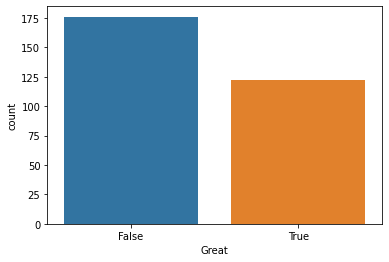

In [61]:
import seaborn as sns
sns.countplot(y_train);

In [62]:
majority_rating = y_train.mode()

In [63]:
y_pred = [majority_rating] * len(y_train)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_train,y_pred)

0.5906040268456376

In [66]:
y_val = validate[target]
y_pred = [majority_rating] * len(y_val)
accuracy_score(y_val, y_pred)

0.5529411764705883

# Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_imp, y_train)
print('Validation Accuracy', log_reg.score(X_val_imp, y_val))

Validation Accuracy 0.8823529411764706


In [92]:
y_pred = log_reg.predict(X_val_imp)

In [93]:
print('Validation Accuracy:', accuracy_score(y_val, y_pred))

Validation Accuracy: 0.8823529411764706


In [85]:
print(features)
print(log_reg.coef_)

['Tortilla', 'Temp', 'Fillings', 'Synergy', 'Uniformity', 'Meat']
[[0.73118908 0.50081786 1.07136221 1.83132688 0.42282744 1.35368387]]


# Test Accuracy Score

In [101]:
y_pred = log_reg.predict(X_test_imp)

In [102]:
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.8421052631578947
